In [26]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture


In [27]:
data_normalized = pd.read_csv("Output/Preprocessed_CC_GENERAL.csv")


In [28]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_normalized)


In [29]:
inertia = []
silhouette_scores_kmeans = []
for k in range(2, 11):  # Trying 2 to 10 clusters
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans_labels = kmeans.fit_predict(data_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores_kmeans.append(silhouette_score(data_scaled, kmeans_labels))


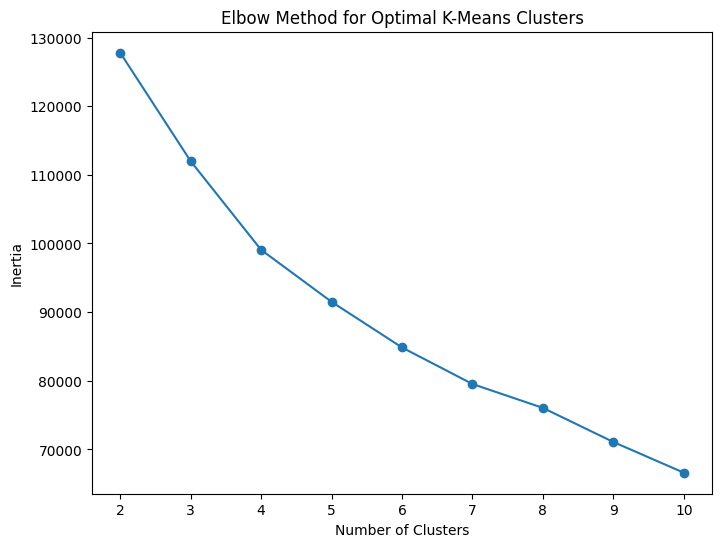

In [30]:
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K-Means Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


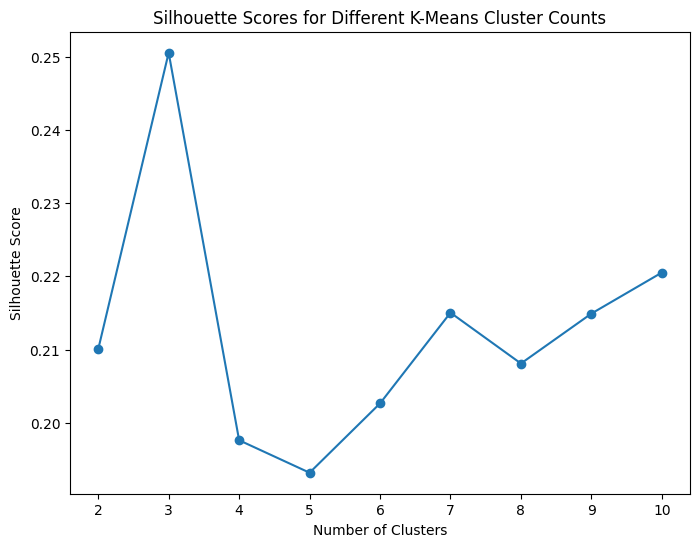

In [31]:
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores_kmeans, marker='o')
plt.title('Silhouette Scores for Different K-Means Cluster Counts')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [32]:
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)



In [33]:
kmeans_silhouette = silhouette_score(data_scaled, kmeans_labels)


In [34]:
dbscan = DBSCAN(eps=0.15, min_samples=16)
dbscan_labels = dbscan.fit_predict(data_scaled)

In [35]:
if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(data_scaled[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
else:
    dbscan_silhouette = -1

In [36]:
print(f"K-means Silhouette Score: {kmeans_silhouette:.4f}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.4f}")


K-means Silhouette Score: 0.2506
DBSCAN Silhouette Score: 0.5711


In [37]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)


In [38]:
plt.figure(figsize=(20, 10))


<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

Text(0, 0.5, 'PCA Component 2')

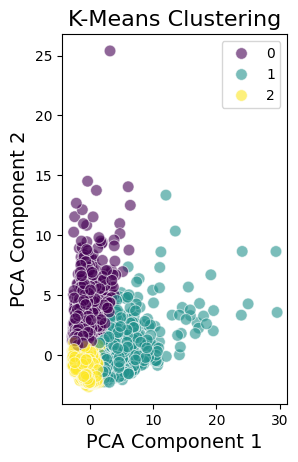

In [39]:
plt.subplot(1, 2, 1)
sns.scatterplot(
    x=data_pca[:, 0],
    y=data_pca[:, 1],
    hue=kmeans_labels,
    palette="viridis",
    legend='full',
    s=70,  # Marker size for better visibility
    alpha=0.6  # Transparency for overlapping points
)
plt.title("K-Means Clustering", fontsize=16)
plt.xlabel("PCA Component 1", fontsize=14)
plt.ylabel("PCA Component 2", fontsize=14)


Text(0, 0.5, 'PCA Component 2')

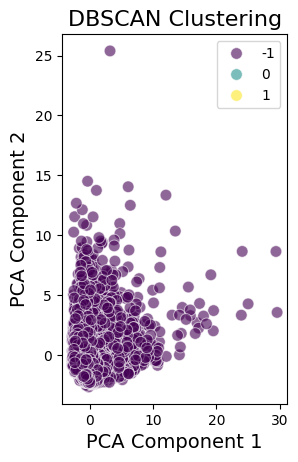

In [40]:
plt.subplot(1, 2, 2)
sns.scatterplot(
    x=data_pca[:, 0],
    y=data_pca[:, 1],
    hue=dbscan_labels,
    palette="viridis",
    legend='full',
    s=70,
    alpha=0.6
)
plt.title("DBSCAN Clustering", fontsize=16)
plt.xlabel("PCA Component 1", fontsize=14)
plt.ylabel("PCA Component 2", fontsize=14)


In [41]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [42]:
if kmeans_silhouette > dbscan_silhouette:
    print("K-means is recommended as it has a higher silhouette score.")
else:
    print("DBSCAN is recommended as it has a higher silhouette score or better noise handling.")


DBSCAN is recommended as it has a higher silhouette score or better noise handling.


In [43]:
new_value1 = 1.5  # Example value for feature 1
new_value2 = 2.5  # Example value for feature 2


In [44]:
new_data = np.array([[new_value1, new_value2] + [0] * (data_normalized.shape[1] - 2)])
new_data_scaled = scaler.transform(new_data)


c:\Users\mmeln\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [45]:
# Predict with K-Means
kmeans_cluster = kmeans.predict(new_data_scaled)
print(f"KMeans: The new data point belongs to cluster {kmeans_cluster[0]}")

# Predict with DBSCAN using NearestNeighbors
neighbors = NearestNeighbors(radius=0.3).fit(data_scaled)  # Same eps value as DBSCAN
distances, indices = neighbors.radius_neighbors(new_data_scaled)

KMeans: The new data point belongs to cluster 2


In [46]:

# Check if DBSCAN labels the point as noise or assigns it to a cluster
if len(indices[0]) > 0:
    print(f"DBSCAN: The new data point belongs to an existing cluster with indices {indices[0]}")
else:
    print("DBSCAN: The new data point is considered noise (label -1 in DBSCAN).")

DBSCAN: The new data point is considered noise (label -1 in DBSCAN).


In [52]:
n_clusters =2# Number of clusters
gmm = GaussianMixture(n_components=n_clusters, random_state=50)
gmm.fit(data_normalized  )

GaussianMixture(n_components=2, random_state=50)

In [53]:
labels = gmm.predict(data_normalized  )


In [54]:
data_normalized  ['Cluster'] = labels


In [56]:
sil_score = silhouette_score(data_normalized .drop('Cluster', axis=1), labels)
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.2001024351294578


In [58]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_normalized .drop('Cluster', axis=1))

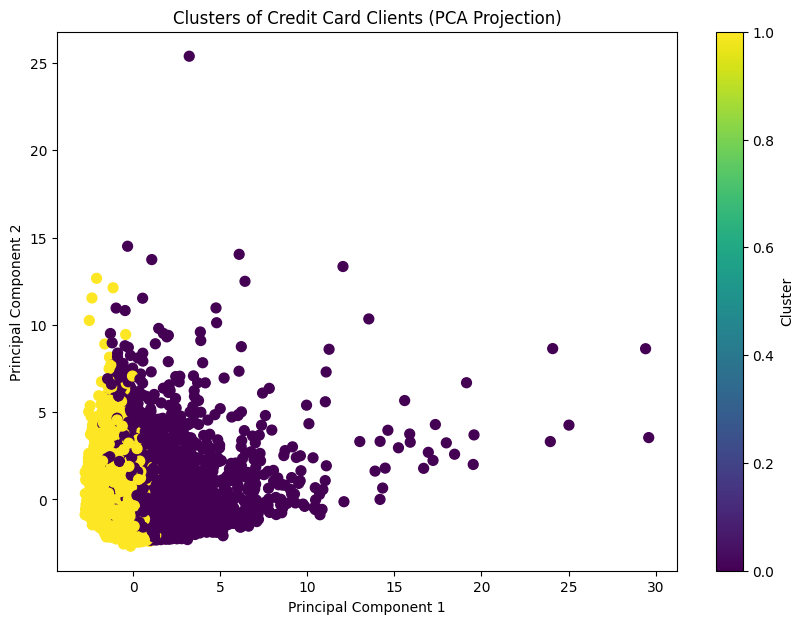

In [59]:
plt.figure(figsize=(10, 7))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.title('Clusters of Credit Card Clients (PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()
